# One:
Register an app to get needed credentials ► https://developer.twitter.com/en/portal/petition/verification

Go to your App and generate an access token

## Hashtags or accounts related to potholes
"@mrpotholeuk",
"potholes",
"#PotholeDeaths",
"pothole damage".

## Hastags or accounts related to the solution
pothole detection

Related links https://www.teslarati.com/tesla-micro-maps-pothole-detection-update-elon-musk/

In [ ]:
import tweepy
import json
import pandas as pd
from pandas.io.json import json_normalize 

In [ ]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [ ]:
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [ ]:
data = api.me()

In [ ]:

# function to convert _json to JSON
def jsonify_tweepy(tweepy_object):
    json_str = json.dumps(tweepy_object._json)
    return json.loads(json_str)

# function to get extended retweets
def jsonify_tweepy_2(tweet_info):

    if "retweeted_status" in dir(tweet_info):
      return tweet_info.retweeted_status.full_text
    else:
      return tweet_info.full_text

# df.iloc[row][col]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


## Tweets from the account "@mrpotholeuk"

In [ ]:
mrpotholeuk_tweets = list(tweepy.Cursor(api.user_timeline, screen_name="mrpotholeuk", tweet_mode="extended").items(1000))

In [ ]:
mrpotholeuk_df = json_normalize([jsonify_tweepy(tweet) for tweet in mrpotholeuk_tweets])
mrpotholeuk_df.full_text = pd.DataFrame([jsonify_tweepy_2(tweet) for tweet in mrpotholeuk_tweets])

In [ ]:
mrpotholeuk_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.url.urls,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,user.listed_count,user.created_at,...,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang,retweeted_status.quoted_status.entities.media,retweeted_status.quoted_status.extended_entities.media,retweeted_status.place.id,retweeted_status.place.url,retweeted_status.place.place_type,retweeted_status.place.name,retweeted_status.place.full_name,retweeted_status.place.country_code,retweeted_status.place.country,retweeted_status.place.contained_within,retweeted_status.place.bounding_box.type,retweeted_status.place.bounding_box.coordinates,retweeted_status.quoted_status.quoted_status_id,retweeted_status.quoted_status.quoted_status_id_str,retweeted_status.quoted_status.quoted_status_permalink.url,retweeted_status.quoted_status.quoted_status_permalink.expanded,retweeted_status.quoted_status.quoted_status_permalink.display,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,quoted_status.quoted_status_permalink.url,quoted_status.quoted_status_permalink.expanded,quoted_status.quoted_status_permalink.display,quoted_status.place.id,quoted_status.place.url,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates
0,Sat Feb 13 22:50:25 +0000 2021,1360723026090872838,1360723026090872838,@MotorwaysKill Time for @grantshapps to #RedXS...,False,"[0, 140]","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,None,None,None,None,False,3,0,False,False,en,"[{'text': 'RedXSlowLane', 'indices': [57, 70]}]",[],"[{'screen_name': 'mrpotholeuk', 'name': 'Mr Po...",[],1667340889,1667340889,Mr Pothole,mrpotholeuk,,World's Best know Pothole Campaigner! Media go...,https://t.co/xwa7V30Dgc,"[{'url': 'https://t.co/xwa7V30Dgc', 'expanded_...","[{'url': 'https://t.co/PCTDjjicPl', 'expanded_...",False,5917,4817,67,Tue Aug 13 09:22:29 +0000 2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sat Feb 13 22:23:53 +0000 2021,1360716351569072137,1360716351569072137,@1kilroywashere @mariannebirkby @crimlawuk @Su...,False,"[0, 140]","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,None,None,None,None,False,10,0,False,False,en,[],[],"[{'screen_name': 'mrpotholeuk', 'name': 'Mr Po...",[],1667340889,1667340889,Mr Pothole,mrpotholeuk,,World's Best know Pothole Campaigner! Media go...,https://t.co/xwa7V30Dgc,"[{'url': 'https://t.co/xwa7V30Dgc', 'expanded_...","[{'url': 'https://t.co/PCTDjjicPl', 'expanded_...",False,5917,4817,67,Tue Aug 13 09:22:29 +0000 2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sat Feb 13 18:10:53 +0000 2021,1360652682189557764,1360652682189557764,@MotorwaysKill Time for @grantshapps to #RedXS...,False,"[15, 258]","<a href=""http://twitter.com/download/android"" ...",1.360640e+18,1360640292907548676,1.177709e+18,1177709329295822848,MotorwaysKill,None,None,None,None,False,3,3,False,False,en,"[{'text': 'RedXSlowLane', 'indices': [40, 53]}]",[],"[

In [ ]:
mrpotholeuk_df.to_csv(r'mrpotholeuk_df.csv')

## Tweets related to "potholes"

In [ ]:
potholes_request = list(tweepy.Cursor(api.search, q="potholes", tweet_mode="extended").items(2000))

In [ ]:
potholes_df = json_normalize([jsonify_tweepy(tweet) for tweet in potholes_request])
potholes_df.full_text = pd.DataFrame([jsonify_tweepy_2(tweet) for tweet in potholes_request])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [ ]:
potholes_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,metadata.iso_language_code,metadata.result_type,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.url.urls,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,...,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang,retweeted_status.place.id,retweeted_status.place.url,retweeted_status.place.place_type,retweeted_status.place.name,retweeted_status.place.full_name,retweeted_status.place.country_code,retweeted_status.place.country,retweeted_status.place.contained_within,retweeted_status.place.bounding_box.type,retweeted_status.place.bounding_box.coordinates,quoted_status.entities.media,quoted_status.extended_entities.media,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,retweeted_status.quoted_status.quoted_status_id,retweeted_status.quoted_status.quoted_status_id_str,quoted_status.place.id,quoted_status.place.url,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,retweeted_status.quoted_status.place.id,retweeted_status.quoted_status.place.url,retweeted_status.quoted_status.place.place_type,retweeted_status.quoted_status.place.name,retweeted_status.quoted_status.place.full_name,retweeted_status.quoted_status.place.country_code,retweeted_status.quoted_status.place.country,retweeted_status.quoted_status.place.contained_within,retweeted_status.quoted_status.place.bounding_box.type,retweeted_status.quoted_status.place.bounding_box.coordinates
0,Sun Feb 14 03:38:56 +0000 2021,1360795633502670848,1360795633502670848,@laradsouzaa @ca_akshaya_cisa @MeghUpdates Tes...,False,"[43, 187]","<a href=""http://twitter.com/download/android"" ...",1.360665e+18,1360665298295132160,140292626.0,140292626,laradsouzaa,None,None,NaN,None,False,0,0,False,False,en,[],[],"[{'screen_name': 'laradsouzaa', 'name': 'Lara ...",[],en,recent,1343903227746500610,1343903227746500610,Dynamo,imDynamo_,India,I Tweet Adult Content Also. So Follow At Your ...,https://t.co/990q7OH5T0,"[{'url': 'https://t.co/990q7OH5T0', 'expanded_...",[],False,18,248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sun Feb 14 03:36:50 +0000 2021,1360795108099039237,1360795108099039237,How to avoid potholes? \n\nCheck out HERE and ...,False,"[0, 132]","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,None,None,NaN,None,False,1,0,False,False,en,"[{'text': 'roadhazard', 'indices': [79, 90]}, ...",[],"[{'screen_name': 'here', 'name': 'HERE Technol...","[{'url': 'https://t.co/M7CiolFFoV', 'expanded_...",en,recent,1427153870,1427153870,Swarup Furia,swarupfuria,,,None,NaN,[],False,31,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sun Feb 14 03:30:53 +0000 2021,1360793609663086598,1360793609663086598,HELLO WHERE IS MAYOR\nI HAVE CITIZEN COMPLAINT...,False,"[0, 60]","<a href=""https://cheapbotsdonequick.com"" rel=""...",NaN,None,NaN,None,None,None,None,NaN,None,False,0,1,False,False,en,[],[],[],[],en,recent,910281036491354112,910281036491354112,FINALPAM.txt,finalpambot,WASTELAND,"Quotes from the Final Pam, the breakout charac...",None,NaN,[],False,1469,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
potholes_df.to_csv(r'potholes_df1.csv')

## Executing sentiment analisis

In [4]:
#!pip install langdetect

In [3]:
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
# Loading the info
tweets_full_info = pd.read_csv("mrpotholeuk_df.csv")

In [7]:
tweets = tweets_full_info.full_text

In [21]:
# For the new dataframe columns
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [18]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [22]:
noOfTweet = 1000

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [23]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  313
negative number:  310
neutral number:  377


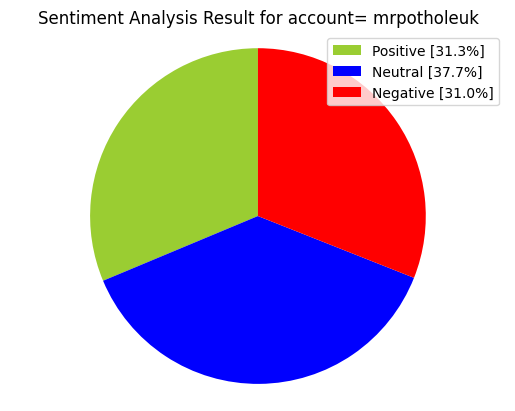

In [27]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for account= mrpotholeuk" )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list.drop_duplicates(inplace = True)